In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt


In [2]:
names=['data','Open','Close','High','Low','Volume']
mydateparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")

aucofile="/home/antoiovi/Documents/dati/auco.csv"
xchafile="/home/antoiovi/Documents/dati/xcha.csv"
auco=pd.read_csv(aucofile,parse_dates=['data'],date_parser=mydateparser,sep=";",
                 names=names,decimal=',',index_col='data')

xcha=pd.read_csv(xchafile,parse_dates=['data'],date_parser=mydateparser,sep=";",
                 names=names,decimal=',',index_col='data')

/home/antoiovi/anaconda3/envs/Finantial/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


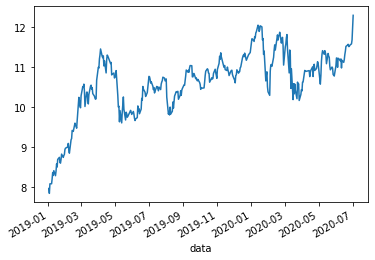

In [3]:
#auco['Close'].plot()
xcha['Close'].plot()

In [144]:
auco.head()

,Open,Close,High,Low,Volume
data,,,,,
2019-01-02,18.290,18.700,18.700,18.290,7727
2019-01-03,18.644,18.680,18.836,18.580,24854
2019-01-04,19.000,18.732,19.024,18.588,25933
2019-01-07,19.000,18.578,19.106,18.578,14325
2019-01-08,18.346,18.410,18.498,18.226,44008


In [145]:

df=xcha
df['MM20']=df['Open'].rolling(window=20).mean()
df['MM5']=df['Open'].rolling(window=5).mean()
df['MM13']=df['Open'].rolling(window=13).mean()
df['MM50']=df['Open'].rolling(window=50).mean()


df=auco
df['MM20']=df['Open'].rolling(window=20).mean()
df['MM5']=df['Open'].rolling(window=5).mean()
df['MM13']=df['Open'].rolling(window=13).mean()
df['MM50']=df['Open'].rolling(window=50).mean()


In [146]:
 df

,Open,Close,High,Low,Volume,MM20,MM5,MM13,MM50
data,,,,,,,,,
2019-01-02,18.290,18.700,18.700,18.290,7727,NaN,NaN,NaN,NaN
2019-01-03,18.644,18.680,18.836,18.580,24854,NaN,NaN,NaN,NaN
2019-01-04,19.000,18.732,19.024,18.588,25933,NaN,NaN,NaN,NaN
2019-01-07,19.000,18.578,19.106,18.578,14325,NaN,NaN,NaN,NaN
2019-01-08,18.346,18.410,18.498,18.226,44008,NaN,18.656,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-06-26,31.010,30.660,31.075,30.515,8116,29.86025,30.821,29.922308,30.5634
2020-06-29,31.015,31.225,31.300,30.675,3182,29.88200,31.014,30.045000,30.6334
2020-06-30,31.500,32.320,32.400,31.350,9798,29.88325,31.121,30.160385,30.7133


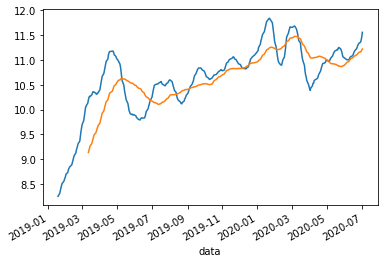

In [147]:
df=xcha
df.MM13.plot()
df.MM50.plot()

In [160]:
df=xcha
import math
credito=0
lastbuy=0
guadagno=0
def buy(row):
    global credito,lastbuy,buyed
    print('{} buy  {} '.format(row.name,row['Close']))
    credito=credito+1
    lastbuy=row['Close']
    buyed.append(lastbuy)
def sell(row):
    global credito,lastbuy,guadagno
    g=(row['Close']-lastbuy)
    guadagno=guadagno+g
    print('{} sell  {} Guadagno {} '.format(row.name,row['Close'],g))
    credito=credito-1
    
buyed=[]

mm13=0
mm50=None
stato='START'
#Posizione media veloce (per indicare l'entry point)
POSIZONE_MV='START'
BUY=False
for index, row in df.iterrows():
    #print('mm13 :{} mm50 {} stato {}'.format(mm13,mm50,stato))
    if stato== 'START':
        #print(stato)
        mm50=row['MM50']
        mm13=row['MM13']
        if (math.isnan(mm50)|math.isnan(mm13)):
            stato=='START'
        else:
            stato='NULLO' 
            if mm13>mm50:
                POSIZONE_MV='SOPRA' 
            else :
                POSIZONE_MV='SOTTO'
    elif stato=='NULLO':
        #print(stato)
        if row['MM13']>row['MM50']:
            # Se Media veloce SORPASSA media lenta
            if POSIZONE_MV=='SOTTO':
                buy(row)
                stato='BUY'
            POSIZONE_MV='SOPRA'
        elif row['MM13']<row['MM50']:
            POSIZONE_MV='SOTTO'
            if stato== 'BUY':
                sell(row) 
                stato='NULLO'
        mm50=row['MM50']
        mm13=row['MM13']
    elif stato == 'BUY':
        #print(stato)
        if row['MM13']<row['MM50']:
            sell(row) 
            stato='NULLO'
            POSIZONE_MV='SOTTO'
        mm50=row['MM50']
        mm13=row['MM13']
last=df.iloc[-1][2]
prezzomedio=np.mean(buyed)
print('Credito {},  Guadagno {} Prezzo medio :{} '.format((credito*last),guadagno,prezzomedio))
100*guadagno/prezzomedio

2019-06-28 00:00:00 buy  10.362 
2019-08-13 00:00:00 sell  10.124 Guadagno -0.23799999999999955 
2019-09-05 00:00:00 buy  10.774000000000001 
2019-12-06 00:00:00 sell  10.927999999999999 Guadagno 0.15399999999999814 
2019-12-17 00:00:00 buy  11.27 
2020-02-04 00:00:00 sell  10.902000000000001 Guadagno -0.36799999999999855 
2020-02-20 00:00:00 buy  11.786 
2020-03-13 00:00:00 sell  10.954 Guadagno -0.831999999999999 
2020-05-05 00:00:00 buy  10.786 
Credito 12.292,  Guadagno -1.283999999999999 Prezzo medio :10.995600000000001 


-11.677398232020069

In [159]:
df=auco
import math
credito=0
lastbuy=0
guadagno=0
def buy(row):
    global credito,lastbuy,buyed
    print('{} buy  {} '.format(row.name,row['Close']))
    credito=credito+1
    lastbuy=row['Close']
    buyed.append(lastbuy)
def sell(row):
    global credito,lastbuy,guadagno
    g=(row['Close']-lastbuy)
    guadagno=guadagno+g
    print('{} sell  {} Guadagno {} '.format(row.name,row['Close'],g))
    credito=credito-1
    
buyed=[]

mm13=0
mm50=None
stato='START'
#Posizione media veloce (per indicare l'entry point)
POSIZONE_MV='START'
BUY=False
for index, row in df.iterrows():
    #print('mm13 :{} mm50 {} stato {}'.format(mm13,mm50,stato))
    if stato== 'START':
        #print(stato)
        mm50=row['MM50']
        mm13=row['MM13']
        if (math.isnan(mm50)|math.isnan(mm13)):
            stato=='START'
        else:
            stato='NULLO' 
            if mm13>mm50:
                POSIZONE_MV='SOPRA' 
            else :
                POSIZONE_MV='SOTTO'
    elif stato=='NULLO':
        #print(stato)
        if row['MM13']>row['MM50']:
            # Se Media veloce SORPASSA media lenta
            if POSIZONE_MV=='SOTTO':
                buy(row)
                stato='BUY'
            POSIZONE_MV='SOPRA'
        elif row['MM13']<row['MM50']:
            POSIZONE_MV='SOTTO'
            if stato== 'BUY':
                sell(row) 
                stato='NULLO'
        mm50=row['MM50']
        mm13=row['MM13']
    elif stato == 'BUY':
        #print(stato)
        if row['MM13']<row['MM50']:
            sell(row) 
            stato='NULLO'
            POSIZONE_MV='SOTTO'
        mm50=row['MM50']
        mm13=row['MM13']
last=df.iloc[-1][2]
prezzomedio=np.mean(buyed)
print('Credito {},  Guadagno {} Prezzo medio :{} '.format((credito*last),guadagno,prezzomedio))
100*guadagno/prezzomedio

2019-06-10 00:00:00 buy  20.0 
2019-09-23 00:00:00 sell  26.48 Guadagno 6.48 
2019-12-16 00:00:00 buy  24.99 
2020-03-11 00:00:00 sell  23.5 Guadagno -1.4899999999999984 
2020-04-20 00:00:00 buy  27.91 
2020-06-16 00:00:00 sell  29.345 Guadagno 1.4349999999999987 
Credito 0.0,  Guadagno 6.425000000000001 Prezzo medio :24.299999999999997 


26.440329218107003

In [156]:
np.mean(buyed)

24.299999999999997